In [2]:
import pickle

with open('train_magnetism.pkl', 'rb') as f:
    train_magnetism = pickle.load(f)
with open('test_magnetism.pkl', 'rb') as f:
    test_magnetism = pickle.load(f)

In [3]:
print(len(train_magnetism))

31


In [4]:
# training and testing split

train = train_magnetism[2]
test = test_magnetism[2]

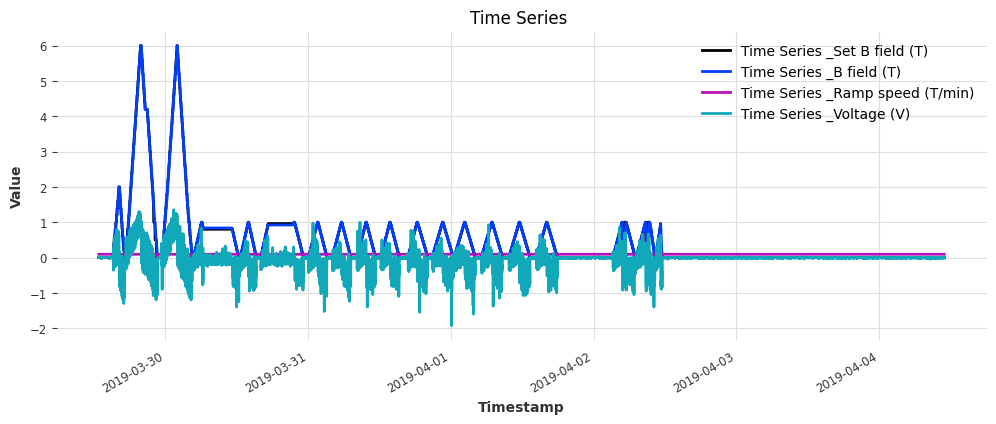

In [5]:
import matplotlib.pyplot as plt
from darts import TimeSeries

plt.figure(figsize=(12, 4))
train.plot(label=f'Time Series ')
plt.title(f'Time Series ')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

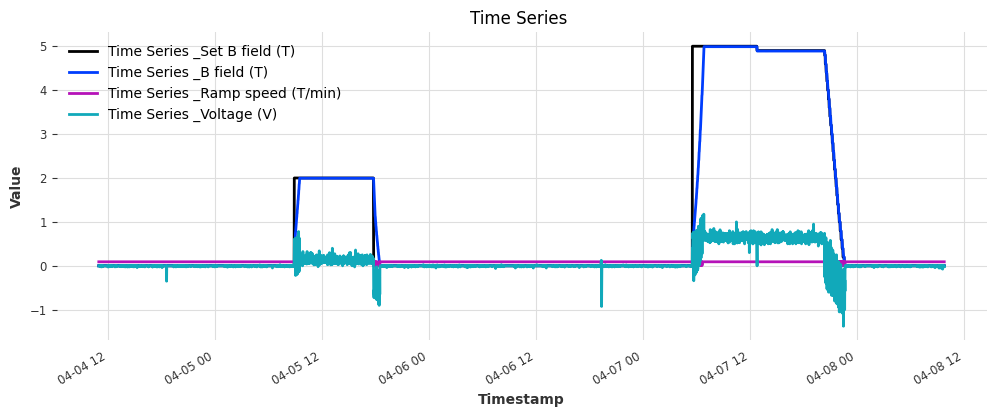

In [6]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming 'time_series_list' is the list of Darts TimeSeries objects

# Create a separate window for each time series
plt.figure(figsize=(12, 4))
test.plot(label=f'Time Series ')
plt.title(f'Time Series ')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

<Axes: xlabel='Timestamp'>

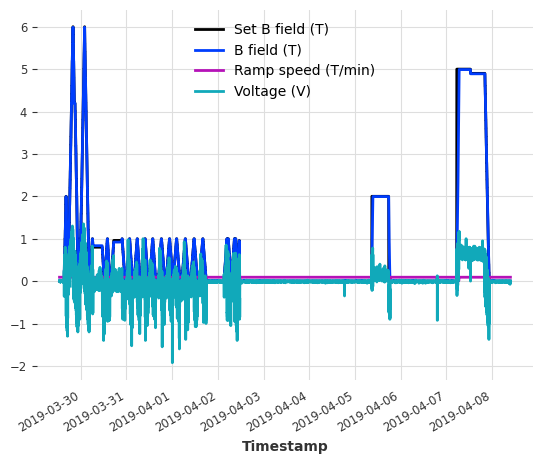

In [7]:
series = train.concatenate(test)
series.plot()

# RNN With Multivariate Target Data, but still only one future covariate

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')


<Axes: xlabel='Timestamp'>

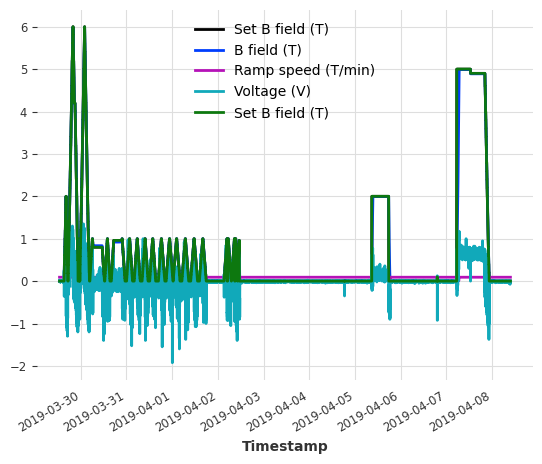

In [8]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
from darts.utils.timeseries_generation import gaussian_timeseries
# from darts import add_covariate

print(series.columns)

train_series = series  # Assuming the first variable is your target
covariate_series = series['Set B field (T)'] # Assuming the second variable is your covariate

train_series.plot()
covariate_series.plot()

In [9]:
# RNN Model /Baseline

# Split the data into training and validation sets
train_size = int(len(series) * 0.5)
val_series = train_series[train_size:]
train_series = train_series[:train_size]
print(len(train_series))

7109


In [10]:
# Create an RNN model (you can choose other models based on your preference)
model = RNNModel(input_chunk_length=400, output_chunk_length=100, n_epochs=10)

# Fit the model to the training data
model.fit(train_series, future_covariates = covariate_series, verbose=True)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 800   
4 | V             | Linear           | 104   
---------------------------------------------------
904       Trainable params
0         Non-trainable params
904       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 51.00it/s, train_loss=0.0124] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 50.99it/s, train_loss=0.0124]


RNNModel(model=RNN, hidden_dim=25, n_rnn_layers=1, dropout=0.0, training_length=24, input_chunk_length=400, output_chunk_length=100, n_epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:04<00:00,  0.25it/s]


<Axes: xlabel='Timestamp'>

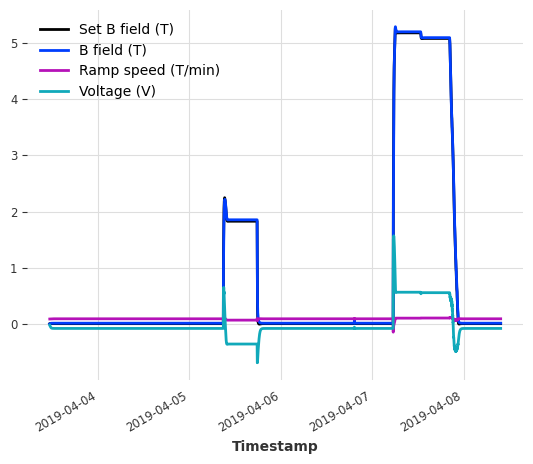

In [11]:
pred_series = model.predict(n=7110)
# print(len(val_series))
# print(len(val_series))
pred_series.plot()

<Axes: xlabel='Timestamp'>

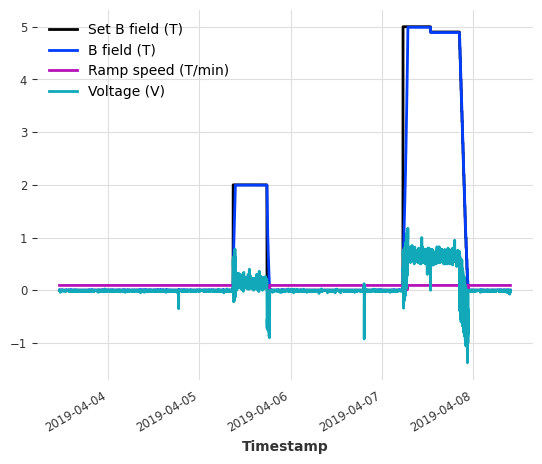

In [12]:
val_series.plot()

In [13]:
import matplotlib.pyplot as plt

class ThresholdDetector:
    def __init__(self, low_threshold=None, high_threshold=None):
        self.low_threshold = low_threshold
        self.high_threshold = high_threshold

    def detect(self, data):
        """
        Detect anomalies based on thresholds.

        Args:
        - data: A list or array of numerical data.

        Returns:
        - A list of indices where anomalies are detected.
        """
        anomalies = []
        for i, value in enumerate(data):
            if self.low_threshold is not None and value < self.low_threshold:
                anomalies.append(i)
            elif self.high_threshold is not None and value > self.high_threshold:
                anomalies.append(i)
        return anomalies

    def plot_with_anomalies(self, data):
        """
        Plot the data along with detected anomalies.

        Args:
        - data: A list or array of numerical data.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(data, label='Data', color='blue')
        anomalies = self.detect(data)
        if anomalies:
            plt.scatter(anomalies, [data[i] for i in anomalies], color='red', label='Anomalies')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Data with Detected Anomalies')
        plt.legend()
        plt.grid(True)
        plt.show()


In [14]:
# Assuming you have imported the necessary modules, including RNNModel and ThresholdDetector

# Create an RNN model (you can choose other models based on your preference)
model = RNNModel(i  )

# Fit the model to the training data
model.fit(train_series, future_covariates=covariate_series, verbose=True)

# Generate forecasts using the trained model
pred_series = model.predict(n=7110)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 800   
4 | V             | Linear           | 104   
---------------------------------------------------
904       Trainable params
0         Non-trainable params
904       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 50.55it/s, train_loss=0.00964]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 222/222 [00:04<00:00, 50.55it/s, train_loss=0.00964]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.33it/s]


<Axes: xlabel='Timestamp'>

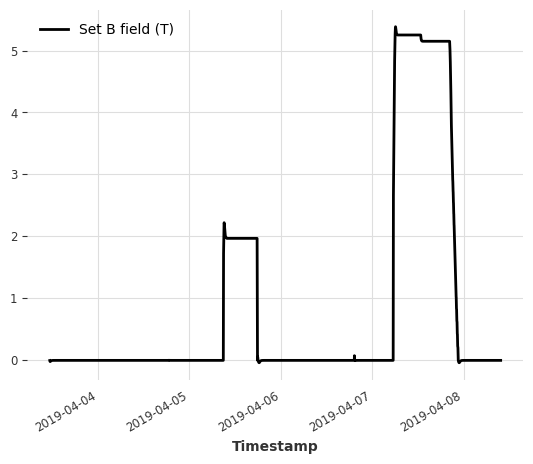

In [15]:
pred_series['Set B field (T)'].plot()

In [16]:
"""
Threshold Detector
------------------

Detector that detects anomaly based on user-given threshold.
This detector compares time series values with user-given thresholds, and
identifies time points as anomalous when values are beyond the thresholds.
"""

from typing import Sequence, Union

import numpy as np

from darts.ad.detectors.detectors import Detector
from darts.logging import raise_if, raise_if_not
from darts.timeseries import TimeSeries


class ThresholdDetector(Detector):
    def __init__(
        self,
        low_threshold: Union[int, float, Sequence[float], None] = None,
        high_threshold: Union[int, float, Sequence[float], None] = None,
    ) -> None:
        """
        Flags values that are either below or above the `low_threshold` and `high_threshold`,
        respectively.

        If a single value is provided for `low_threshold` or `high_threshold`, this same
        value will be used across all components of the series.

        If sequences of values are given for the parameters `low_threshold` and/or `high_threshold`,
        they must be of the same length, matching the dimensionality of the series passed
        to ``detect()``, or have a length of 1. In the latter case, this single value will be used
        across all components of the series.

        If either `low_threshold` or `high_threshold` is None, the corresponding bound will not be used.
        However, at least one of the two must be set.

        Parameters
        ----------
        low_threshold
            (Sequence of) lower bounds.
            If a sequence, must match the dimensionality of the series
            this detector is applied to.
        high_threshold
            (Sequence of) upper bounds.
            If a sequence, must match the dimensionality of the series
            this detector is applied to.
        """

        # TODO: could we refactor some code common between ThresholdDetector and QuantileDetector?

        super().__init__()

        raise_if(
            low_threshold is None and high_threshold is None,
            "At least one parameter must be not None (`low` and `high` are both None).",
        )

        def _prep_thresholds(q):
            return (
                q.tolist()
                if isinstance(q, np.ndarray)
                else [q] if not isinstance(q, Sequence) else q
            )

        low = _prep_thresholds(low_threshold)
        high = _prep_thresholds(high_threshold)

        self.low_threshold = low * len(high) if len(low) == 1 else low
        self.high_threshold = high * len(low) if len(high) == 1 else high

        # the threshold parameters are now sequences of the same length,
        # possibly containing some None values, but at least one non-None value

        raise_if_not(
            len(self.low_threshold) == len(self.high_threshold),
            "Parameters `low_threshold` and `high_threshold` must be of the same length,"
            + f" found `low`: {len(self.low_threshold)} and `high`: {len(self.high_threshold)}.",
        )

        raise_if(
            all([lo is None for lo in self.low_threshold])
            and all([hi is None for hi in self.high_threshold]),
            "All provided threshold values are None.",
        )

        raise_if_not(
            all(
                [
                    l <= h
                    for (l, h) in zip(self.low_threshold, self.high_threshold)
                    if ((l is not None) and (h is not None))
                ]
            ),
            "all values in `low_threshold` must be lower than or equal"
            + "to their corresponding value in `high_threshold`.",
        )

    def _detect_core(self, series: TimeSeries) -> TimeSeries:
        raise_if_not(
            series.is_deterministic, "This detector only works on deterministic series."
        )

        raise_if(
            len(self.low_threshold) > 1 and len(self.low_threshold) != series.width,
            "The number of components of input must be equal to the number"
            + " of threshold values. Found number of "
            + f"components equal to {series.width} and expected {len(self.low_threshold)}.",
        )

        # if length is 1, tile it to series width:
        low_threshold = (
            self.low_threshold * series.width
            if len(self.low_threshold) == 1
            else self.low_threshold
        )
        high_threshold = (
            self.high_threshold * series.width
            if len(self.high_threshold) == 1
            else self.high_threshold
        )

        # (time, components)
        np_series = series.all_values(copy=False).squeeze(-1)

        def _detect_fn(x, lo, hi):
            # x of shape (time,) for 1 component
            return (x < (np.NINF if lo is None else lo)) | (
                x > (np.Inf if hi is None else hi)
            )

        detected = np.zeros_like(np_series, dtype=int)

        for component_idx in range(series.width):
            detected[:, component_idx] = _detect_fn(
                np_series[:, component_idx],
                low_threshold[component_idx],
                high_threshold[component_idx],
            )

        return TimeSeries.from_times_and_values(series.time_index, detected)

In [17]:
# Create a ThresholdDetector instance
detector = ThresholdDetector(low_threshold=-1, high_threshold=1)  # Specify your thresholds

anomalies = detector.detect(pred_series['Set B field (T)']) 

# for index_position in anomalies:
#     # Get the color for the plot
#     colors = ['blue'] * len(pred_series)
#     colors[index_position] = 'red'

#     # Plot the series with the specific data point in red
#     plt.scatter(pred_series['Set B field (T)'][index_position], pred_series['Set B field (T)'], color=colors)
# plt.show()



# # Plot the forecast data with detected anomalies
# # detector.plot_with_anomalies(pred_series['Set B field (T)'])
# anomalies = detector.detect(pred_series['Set B field (T)'])
# plt.scatter(anomalies, [pred_series['Set B field (T)'][i] for i in anomalies], color='red', label='Anomalies')

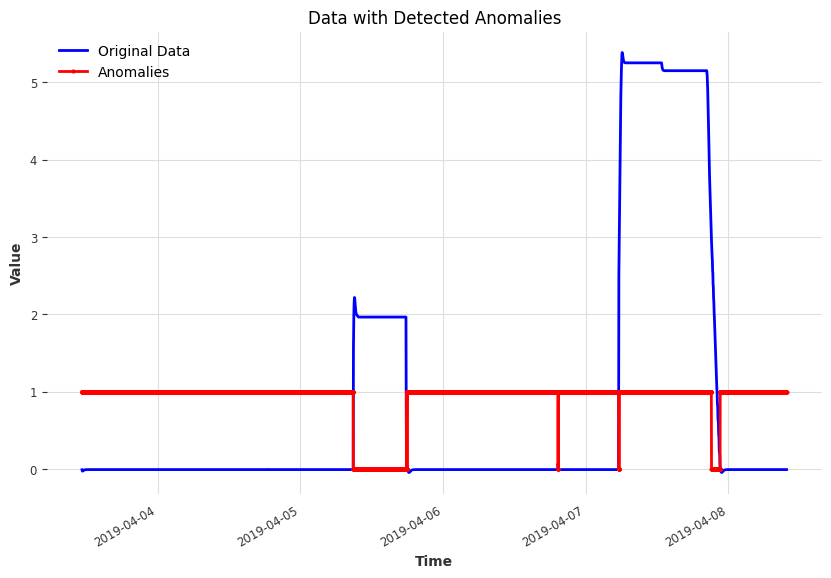

In [18]:
# come up with a formula to see how much variance is appropriate (threshold at specific point)
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.utils import timeseries_generation as tg

detector = ThresholdDetector(low_threshold=0.01, high_threshold=3)  # Specify your thresholds

anomalies = detector.detect(pred_series['Set B field (T)']) 

# Plot the original TimeSeries along with the detected anomalies
plt.figure(figsize=(10, 6))
pred_series['Set B field (T)'].plot(label='Original Data', color='blue')
anomalies.plot(color='red', marker='o', markersize=2, label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data with Detected Anomalies')
plt.legend()
plt.grid(True)
plt.show()

# threshold detector for finetuning
# cut the forecast into different chunks and run threshold detector for each segment 
# cut forecast into 4 segments
# call threshold detector with customized per chunk 

# need to make example (with anomalies)

In [19]:
pred_series.columns

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')

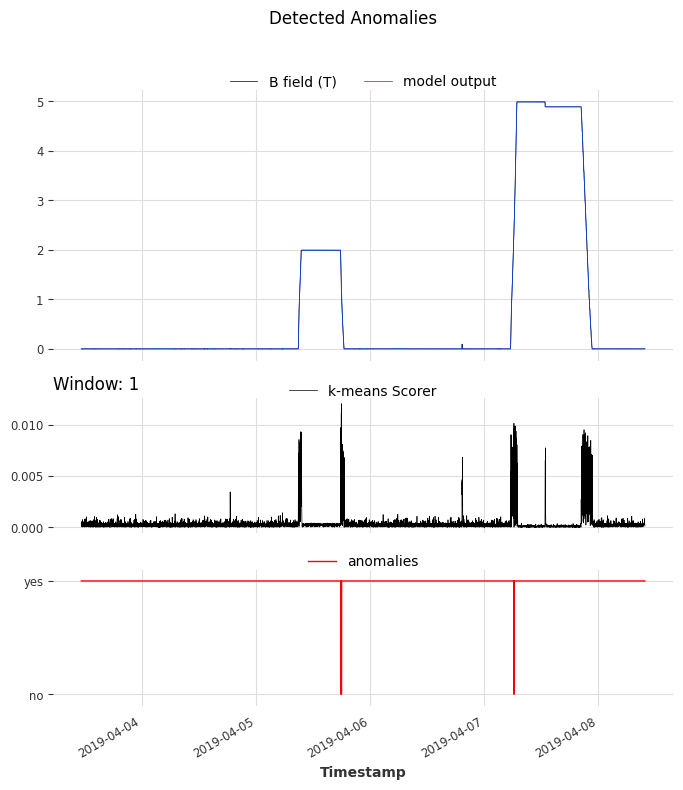

In [20]:
# set b field and b field should be very close to each other 

import darts
from darts.models.filtering.kalman_filter import KalmanFilter
from darts.ad.scorers import KMeansScorer
from darts.ad.detectors import threshold_detector
from darts.ad.anomaly_model import FilteringAnomalyModel
from darts.utils.timeseries_generation import linear_timeseries

# Generate some example time series data
# series = linear_timeseries(start_value=0, end_value=100, length=100)
series = val_series['B field (T)']

kalman_filter = KalmanFilter()

scorer = KMeansScorer()

detector = ThresholdDetector(low_threshold=0.01, high_threshold=3)  # You can adjust the threshold as needed

anomaly_model = FilteringAnomalyModel(model=kalman_filter, scorer=scorer)

anomaly_model.fit(series, allow_model_training=True)

anomaly_scores = anomaly_model.score(series)

anomalies = detector.detect(anomaly_scores)

anomaly_model.show_anomalies(series, title="Detected Anomalies", actual_anomalies=anomalies)


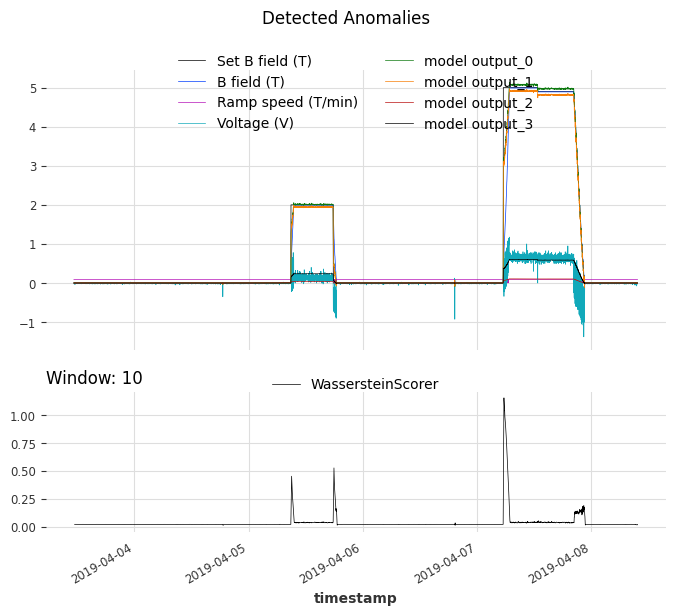

In [42]:
# set b field and b field should be very close to each other 

import darts
from darts.models.filtering.kalman_filter import KalmanFilter
from darts.ad.scorers import KMeansScorer, WassersteinScorer
from darts.ad.detectors import threshold_detector
from darts.ad.anomaly_model import FilteringAnomalyModel
from darts.utils.timeseries_generation import linear_timeseries

# Generate some example time series data
# series = linear_timeseries(start_value=0, end_value=100, length=100)
series = val_series

# Instantiate the Kalman Filter model
kalman_filter = KalmanFilter()

# Instantiate the Standard Scorer for comparing actual and filtered values
scorer = []
# scorer.append(KMeansScorer(window = 300))
scorer.append(WassersteinScorer())

# Instantiate the Absolute Error Detector for identifying anomalies
detector = ThresholdDetector(low_threshold=0.01, high_threshold=3)  # You can adjust the threshold as needed

# Instantiate the FilteringAnomalyModel
anomaly_model = FilteringAnomalyModel(model=kalman_filter, scorer=scorer)

# Fit the FilteringAnomalyModel
anomaly_model.fit(series, allow_model_training=True)

# Get the anomaly scores
anomaly_scores = anomaly_model.score(series)

# Use the detector to identify anomalies based on the scores
anomalies = detector.detect(anomaly_scores)

# Plot the original data along with the detected anomalies
anomaly_model.show_anomalies(series, title="Detected Anomalies",)

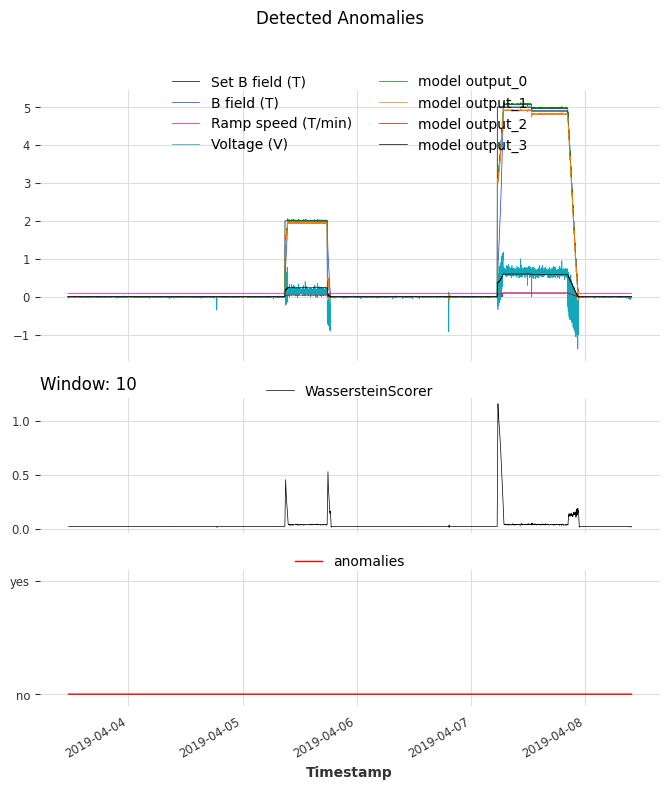

In [43]:
anomaly_model.show_anomalies(series, title="Detected Anomalies", actual_anomalies=anomalies)
